In [15]:
from __future__ import division, print_function
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# change cwd based on OS # ToDO
import os
print(os.getcwd())
path = str(os.getcwd())

D:\DATA\v093216\GIT\nanodegree\p5\final_project


In [28]:
# load data    
if path == "/Users/stefan/Code/nanodegree/p5/final_project":
    f = "./final_project_dataset.pkl"

elif "v093216" in path:
    f = "D:/DATA/v093216/GIT/nanodegree/p5/final_project/final_project_dataset.pkl"

else:
    f = "./final_project/final_project_dataset.pkl"
    
with open(f, "rb") as data_file:
    data_dict = pickle.load(data_file)

# Remove TOTAL
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [29]:
# extract features
from collections import defaultdict
features = defaultdict(list)

for k, v in data_dict.iteritems():
    for k2, v2 in v.iteritems():
        if v2 == "NaN":
            features[k2].append(None)
        else:
            features[k2].append(v2)

In [31]:
# supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# load features into df
df = pd.DataFrame(features)
print(df.shape)
print(df.dtypes)

(145, 21)
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object


In [32]:
# drop email column
df.drop(["email_address"], axis=1, inplace=True)

In [33]:
for c in df.columns:
    print(df[c].describe())

count        81.00
mean    1201773.07
std     1441679.44
min       70000.00
25%      425000.00
50%      750000.00
75%     1200000.00
max     8000000.00
Name: bonus, dtype: float64
count        38.00
mean     841602.53
std     1289322.63
min     -102500.00
25%       79644.50
50%      221063.50
75%      867211.25
max     6426990.00
Name: deferral_payments, dtype: float64
count         48.00
mean     -581049.81
std       942076.40
min     -3504386.00
25%      -611209.25
50%      -151927.00
75%       -37926.00
max         -833.00
Name: deferred_income, dtype: float64
count       16.00
mean     89822.88
std      41112.70
min       3285.00
25%      83674.50
50%     106164.50
75%     112815.00
max     137864.00
Name: director_fees, dtype: float64
count        101.00
mean     2959559.26
std      5499449.60
min         3285.00
25%       506765.00
50%      1297049.00
75%      2542813.00
max     34348384.00
Name: exercised_stock_options, dtype: float64
count       94.00
mean     54192.01
std     

In [34]:
# drop non-important columns
to_drop = ["deferral_payments", "deferred_income", "director_fees", 
           "loan_advances", "other", "restricted_stock_deferred",
          "to_messages", "from_messages"]
df_features = df.drop(to_drop, axis=1)
df_features.shape

(145, 12)

In [35]:
df_features.describe()

,bonus,exercised_stock_options,expenses,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,restricted_stock,salary,shared_receipt_with_poi,total_payments,total_stock_value
count,81.00,101.00,94.00,86.00,86.00,65.00,109.00,94.00,86.00,124.00,125.00
mean,1201773.07,2959559.26,54192.01,64.90,41.23,746491.20,1147424.09,284087.54,1176.47,2623421.18,3352073.02
std,1441679.44,5499449.60,46108.38,86.98,100.07,862917.42,2249770.36,177131.12,1178.32,9488105.53,6532883.10
min,70000.00,3285.00,148.00,0.00,0.00,69223.00,-2604490.00,477.00,2.00,148.00,-44093.00
25%,425000.00,506765.00,22479.00,10.00,1.00,275000.00,252055.00,211802.00,249.75,386380.25,494136.00
50%,750000.00,1297049.00,46547.50,35.00,8.00,422158.00,441096.00,258741.00,740.50,1100246.50,1095040.00
75%,1200000.00,2542813.00,78408.50,72.25,24.75,831809.00,985032.00,308606.50,1888.25,2084662.75,2606763.00
max,8000000.00,34348384.00,228763.00,528.00,609.00,5145434.00,14761694.00,1111258.00,5521.00,103559793.00,49110078.00


In [39]:
df_features.corr()

,bonus,exercised_stock_options,expenses,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,poi,restricted_stock,salary,shared_receipt_with_poi,total_payments,total_stock_value
bonus,1.00,0.51,0.03,0.56,0.35,0.63,0.30,0.38,0.52,0.55,0.57,0.51
exercised_stock_options,0.51,1.00,0.02,0.16,-0.03,0.50,0.50,0.69,0.61,0.15,0.59,0.96
expenses,0.03,0.02,1.00,-0.06,0.01,-0.10,0.06,0.04,0.15,0.22,0.11,0.03
from_poi_to_this_person,0.56,0.16,-0.06,1.00,0.45,0.21,0.17,0.13,0.18,0.66,0.15,0.15
from_this_person_to_poi,0.35,-0.03,0.01,0.45,1.00,0.08,0.11,0.05,0.02,0.48,0.01,0.00
long_term_incentive,0.63,0.50,-0.10,0.21,0.08,1.00,0.25,0.64,0.48,0.18,0.52,0.50
poi,0.30,0.50,0.06,0.17,0.11,0.25,1.00,0.22,0.26,0.23,0.23,0.37
restricted_stock,0.38,0.69,0.04,0.13,0.05,0.64,0.22,1.00,0.55,0.23,0.60,0.86
salary,0.52,0.61,0.15,0.18,0.02,0.48,0.26,0.55,1.00,0.28,0.58,0.61
shared_receipt_with_poi,0.55,0.15,0.22,0.66,0.48,0.18,0.23,0.23,0.28,1.00,0.19,0.18


In [40]:
# drop columns with low corr
low_corr = ["expenses", "from_poi_to_this_person", "from_this_person_to_poi"]
df_features.drop(low_corr, axis=1, inplace=True)

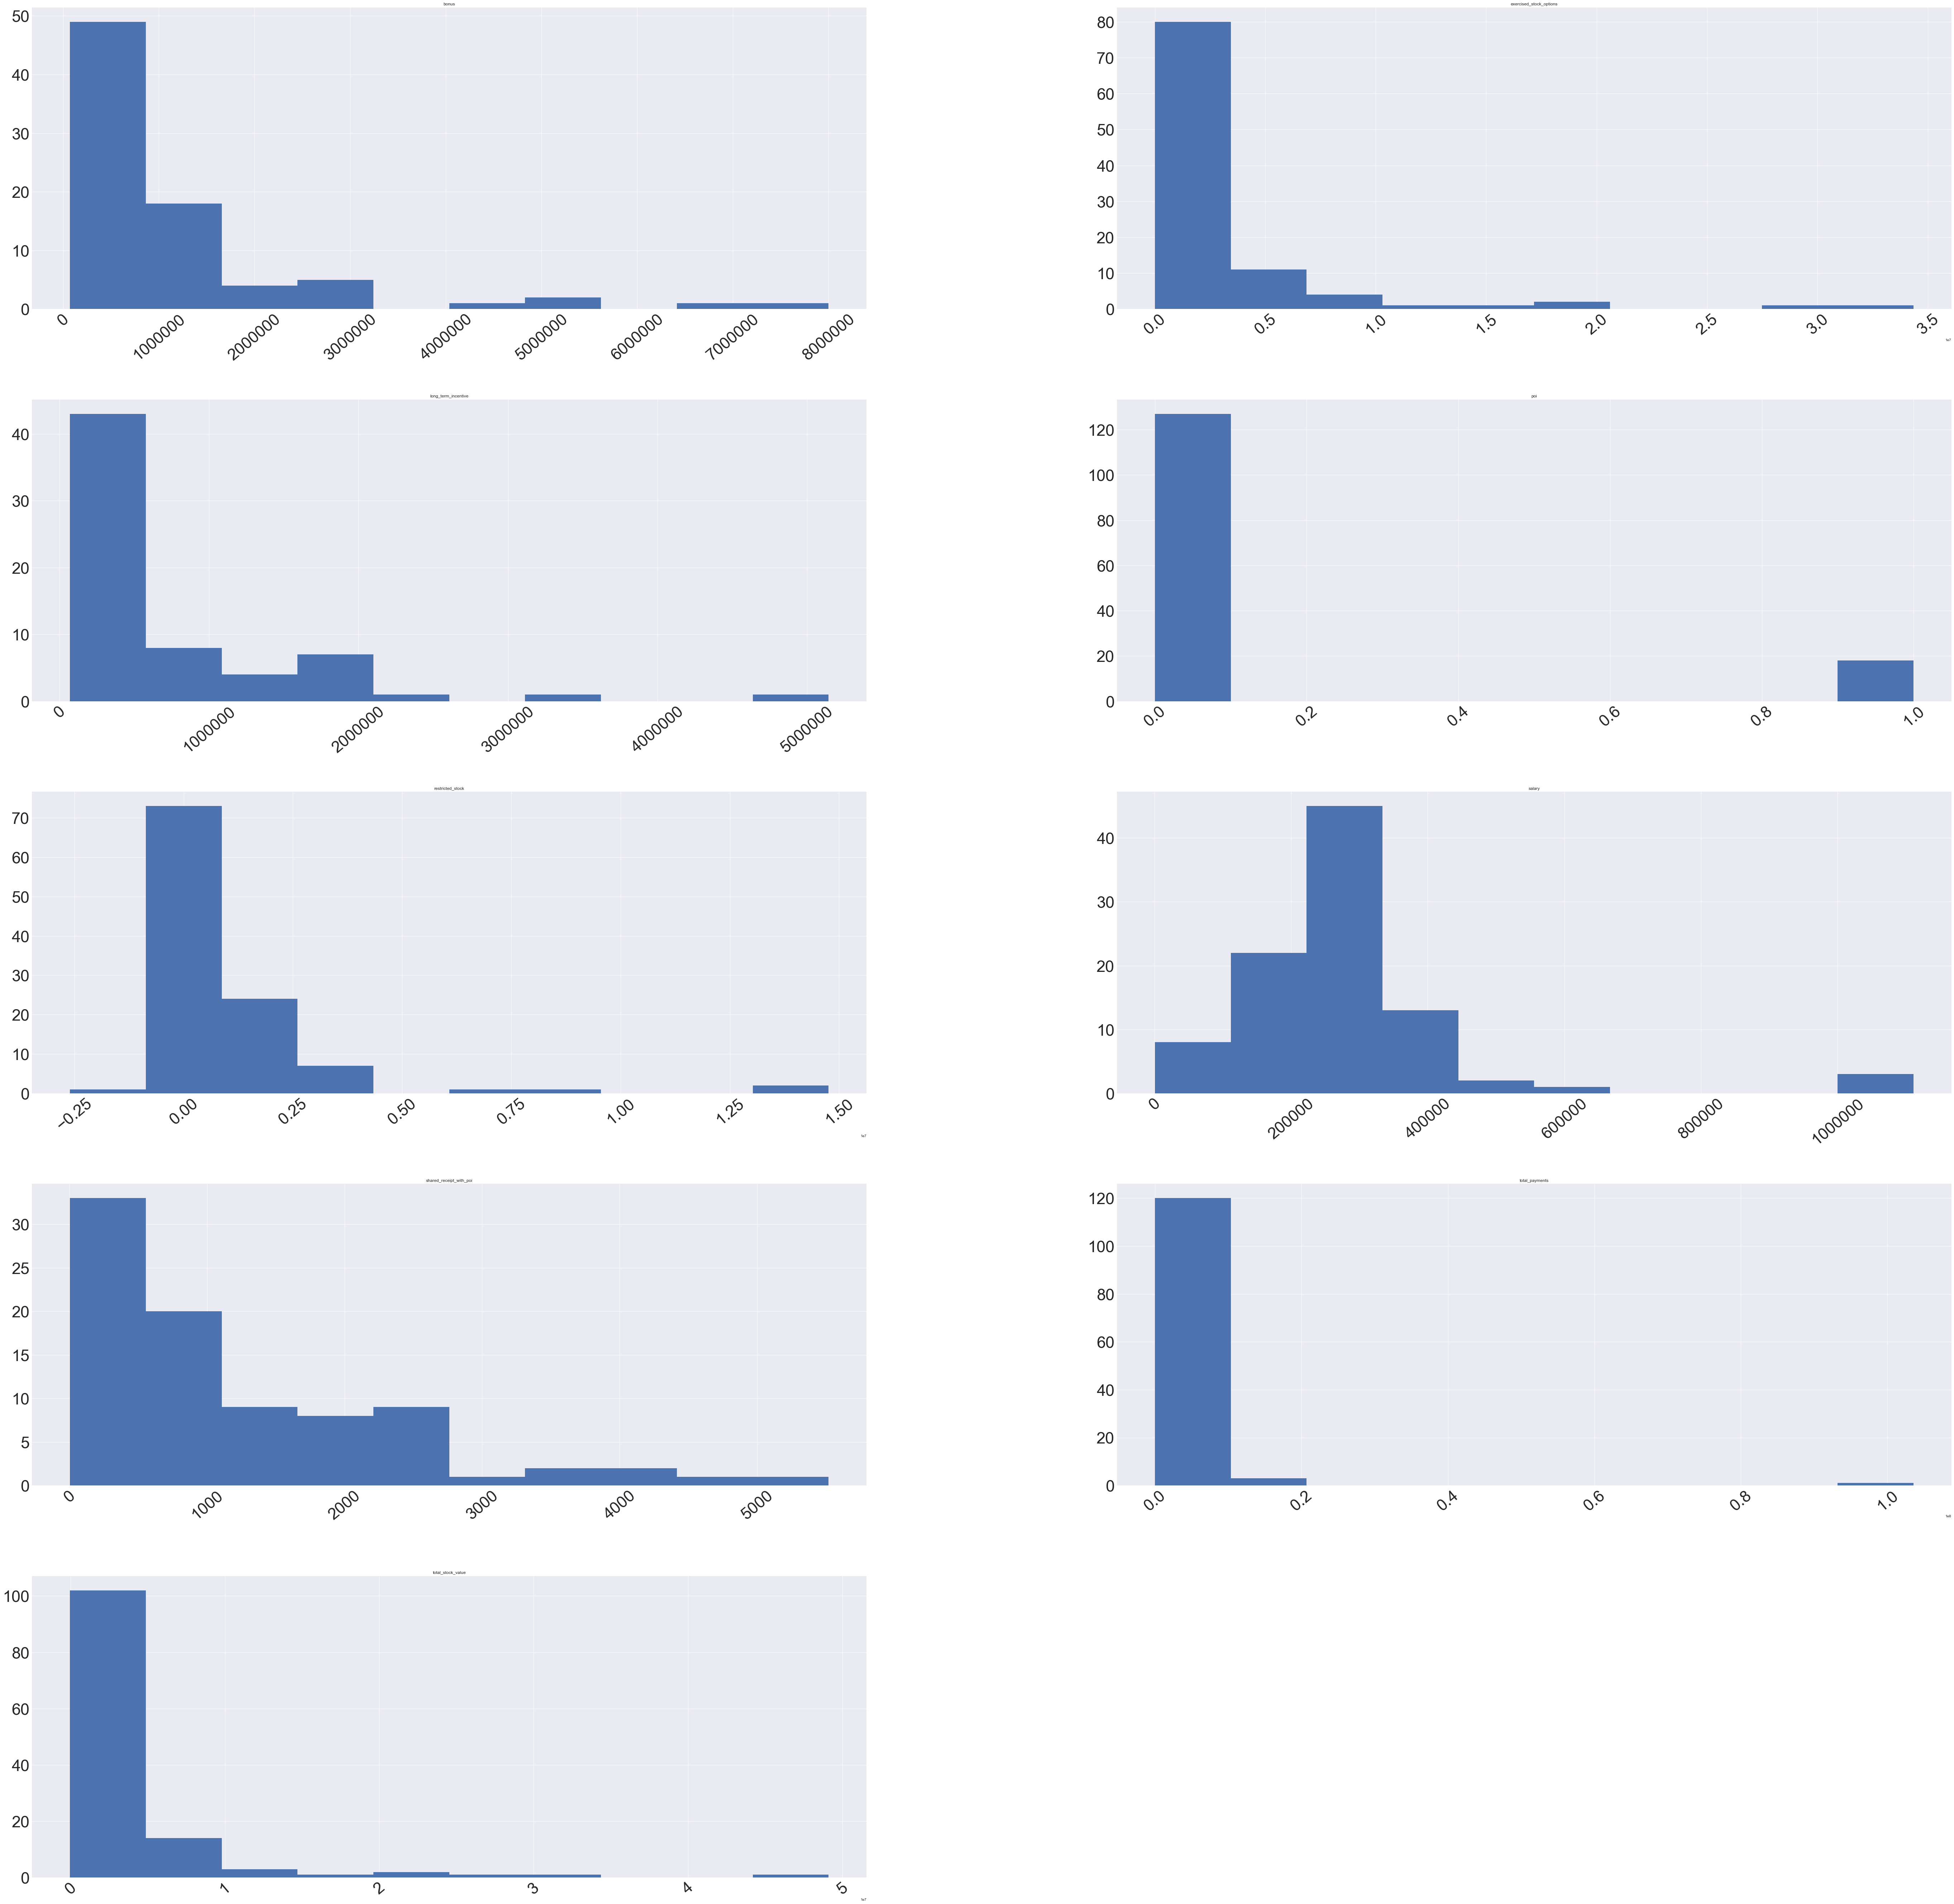

In [62]:
_ = df_features.hist(bins=10, figsize=(96,96), xlabelsize=45, ylabelsize=45, xrot=40, layout=(5,2))

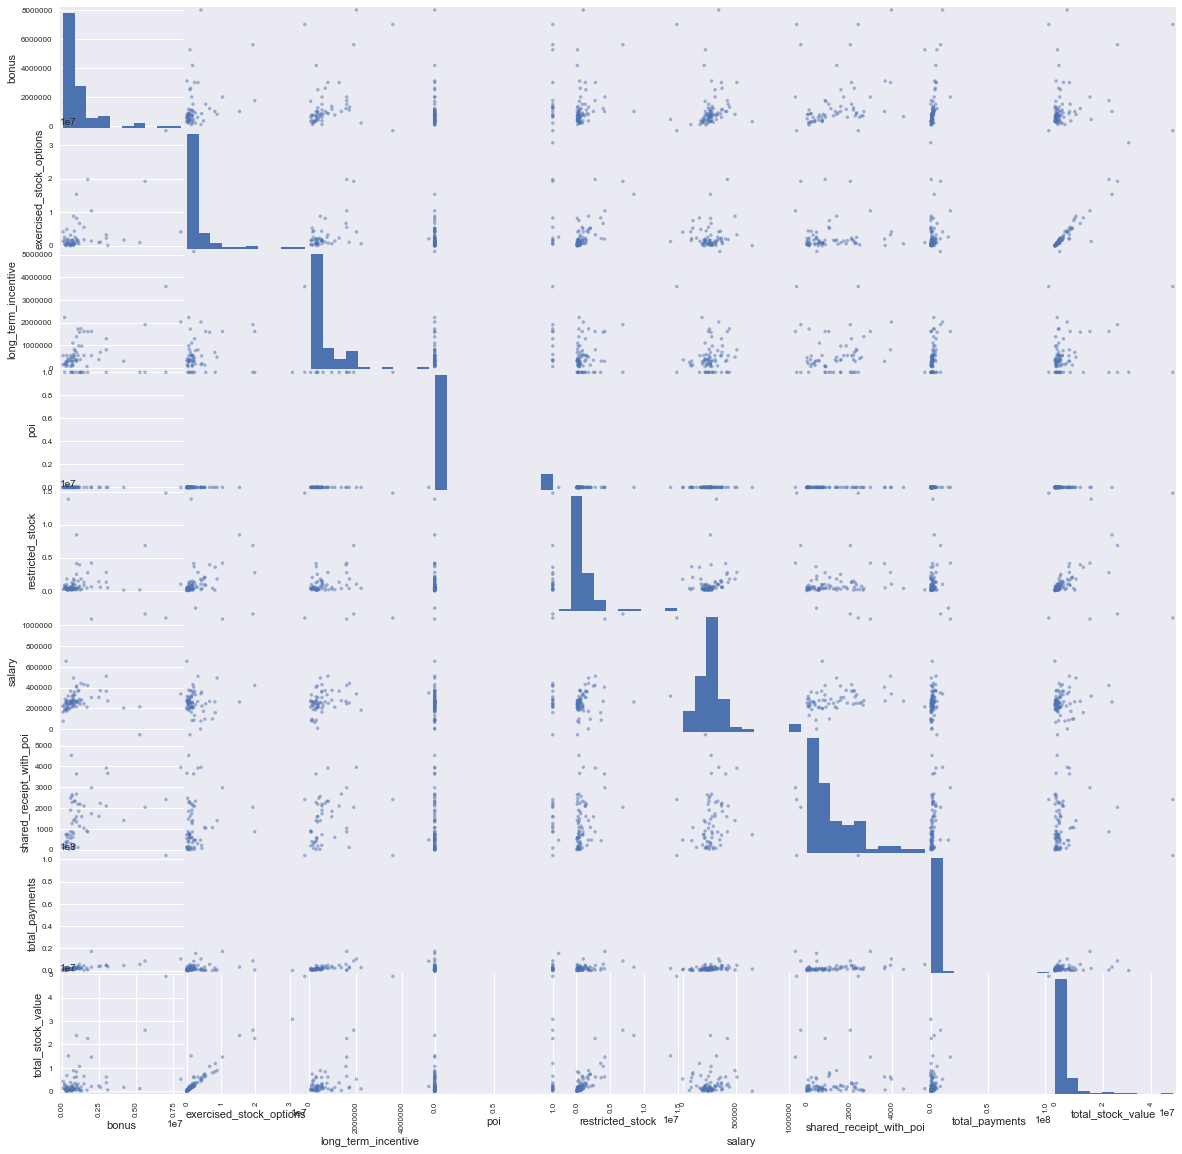

In [63]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df_features, alpha=0.5, figsize=(20, 20))

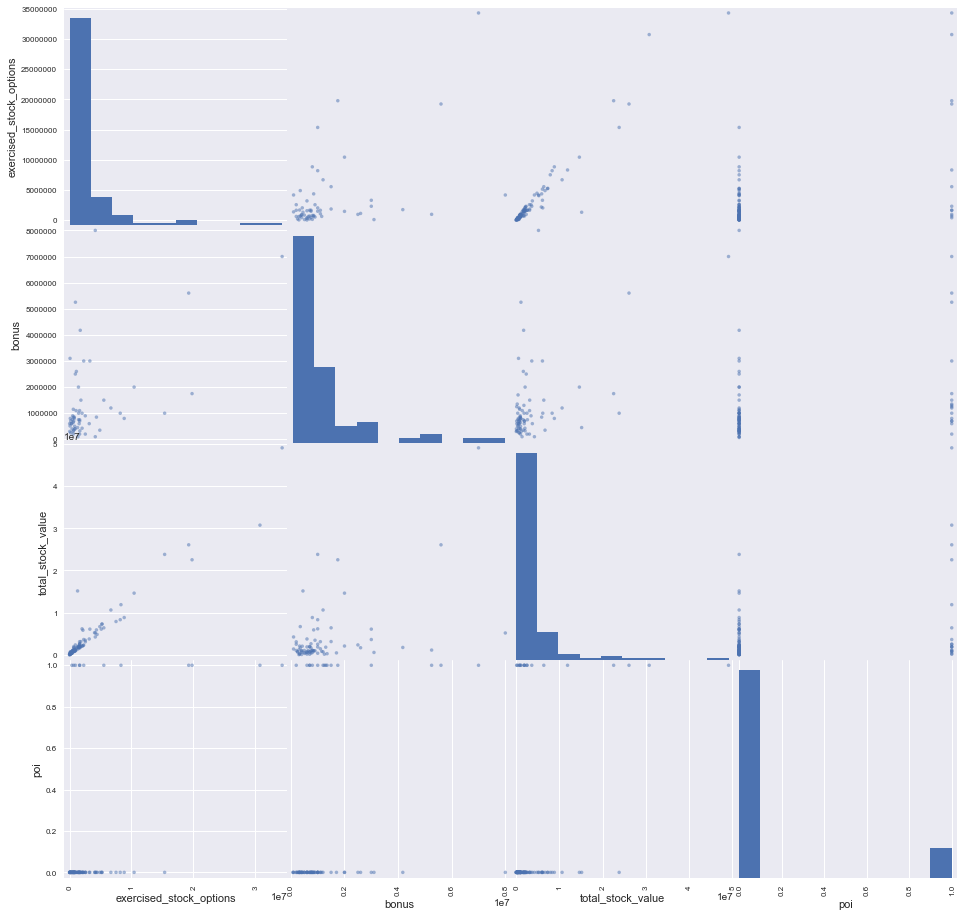

In [67]:
_ = scatter_matrix(df_features[["exercised_stock_options", "bonus", "total_stock_value", "poi"]], alpha = 0.5, figsize=(16,16))